# Exploratory Data Analysis and Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file.
df = pd.read_csv('text.csv', encoding='windows-1255')
df.head()

,Unnamed: 0,דירוג,שם התוכנית,ערוץ/משדר,שעת השידור המקורית,תאריך,משך בדקות,שיעורי צפייה במשקי בית (%),אלפי משקי בית
0,0,1,האח הגדול 2020,רשת 13,21:12,01/01/2020,152.0,20.1,432
1,1,2,חדשות 12,קשת 12,19:56,01/01/2020,88.0,14.0,301
2,2,3,הצינור,רשת 13,23:43,01/01/2020,22.0,13.8,297
3,3,4,תכנית חיסכון 12,קשת 12,19:21,01/01/2020,32.0,12.2,261
4,4,5,חדשות 13,רשת 13,19:57,01/01/2020,75.0,11.2,241


## Feature Engineering

In [3]:
# Create a Datetime column from Date and Time.
df['Datetime'] = df['תאריך'] + ' ' + df['שעת השידור המקורית']
df.head()

,Unnamed: 0,דירוג,שם התוכנית,ערוץ/משדר,שעת השידור המקורית,תאריך,משך בדקות,שיעורי צפייה במשקי בית (%),אלפי משקי בית,Datetime
0,0,1,האח הגדול 2020,רשת 13,21:12,01/01/2020,152.0,20.1,432,01/01/2020 21:12
1,1,2,חדשות 12,קשת 12,19:56,01/01/2020,88.0,14.0,301,01/01/2020 19:56
2,2,3,הצינור,רשת 13,23:43,01/01/2020,22.0,13.8,297,01/01/2020 23:43
3,3,4,תכנית חיסכון 12,קשת 12,19:21,01/01/2020,32.0,12.2,261,01/01/2020 19:21
4,4,5,חדשות 13,רשת 13,19:57,01/01/2020,75.0,11.2,241,01/01/2020 19:57


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.drop(['תאריך', 'שעת השידור המקורית'], axis=1)
df.head()

,Unnamed: 0,דירוג,שם התוכנית,ערוץ/משדר,משך בדקות,שיעורי צפייה במשקי בית (%),אלפי משקי בית,Datetime
0,0,1,האח הגדול 2020,רשת 13,152.0,20.1,432,2020-01-01 21:12:00
1,1,2,חדשות 12,קשת 12,88.0,14.0,301,2020-01-01 19:56:00
2,2,3,הצינור,רשת 13,22.0,13.8,297,2020-01-01 23:43:00
3,3,4,תכנית חיסכון 12,קשת 12,32.0,12.2,261,2020-01-01 19:21:00
4,4,5,חדשות 13,רשת 13,75.0,11.2,241,2020-01-01 19:57:00


In [5]:
# Renaming the columns.
df = df.rename(columns={'Unnamed: 0': 'ID',
                 'דירוג': 'Ranking',
                 'שם התוכנית': 'TV_Show',
                 'ערוץ/משדר': 'Channel',
                 'משך בדקות': 'Duration',
                 'שיעורי צפייה במשקי בית (%)': 'Ranking_Percent',
                 'אלפי משקי בית': 'Households'})
df.head()

,ID,Ranking,TV_Show,Channel,Duration,Ranking_Percent,Households,Datetime
0,0,1,האח הגדול 2020,רשת 13,152.0,20.1,432,2020-01-01 21:12:00
1,1,2,חדשות 12,קשת 12,88.0,14.0,301,2020-01-01 19:56:00
2,2,3,הצינור,רשת 13,22.0,13.8,297,2020-01-01 23:43:00
3,3,4,תכנית חיסכון 12,קשת 12,32.0,12.2,261,2020-01-01 19:21:00
4,4,5,חדשות 13,רשת 13,75.0,11.2,241,2020-01-01 19:57:00


In [6]:
# Perform feature extraction from the Datetime column we made earlier.
df['Month'] = df['Datetime'].dt.month
df['Week'] = df['Datetime'].dt.week
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Day_of_week'] = df['Datetime'].dt.day_of_week
df.head()

C:\Users\bardd\AppData\Local\Temp\ipykernel_11700\791932970.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Datetime'].dt.week


,ID,Ranking,TV_Show,Channel,Duration,Ranking_Percent,Households,Datetime,Month,Week,Day,Hour,Minute,Day_of_week
0,0,1,האח הגדול 2020,רשת 13,152.0,20.1,432,2020-01-01 21:12:00,1,1,1,21,12,2
1,1,2,חדשות 12,קשת 12,88.0,14.0,301,2020-01-01 19:56:00,1,1,1,19,56,2
2,2,3,הצינור,רשת 13,22.0,13.8,297,2020-01-01 23:43:00,1,1,1,23,43,2
3,3,4,תכנית חיסכון 12,קשת 12,32.0,12.2,261,2020-01-01 19:21:00,1,1,1,19,21,2
4,4,5,חדשות 13,רשת 13,75.0,11.2,241,2020-01-01 19:57:00,1,1,1,19,57,2


In [7]:
# Scaling Households.
df['Households'] = df['Households'].map(lambda x : x * 1000)
df.head()

,ID,Ranking,TV_Show,Channel,Duration,Ranking_Percent,Households,Datetime,Month,Week,Day,Hour,Minute,Day_of_week
0,0,1,האח הגדול 2020,רשת 13,152.0,20.1,432000,2020-01-01 21:12:00,1,1,1,21,12,2
1,1,2,חדשות 12,קשת 12,88.0,14.0,301000,2020-01-01 19:56:00,1,1,1,19,56,2
2,2,3,הצינור,רשת 13,22.0,13.8,297000,2020-01-01 23:43:00,1,1,1,23,43,2
3,3,4,תכנית חיסכון 12,קשת 12,32.0,12.2,261000,2020-01-01 19:21:00,1,1,1,19,21,2
4,4,5,חדשות 13,רשת 13,75.0,11.2,241000,2020-01-01 19:57:00,1,1,1,19,57,2


## Exploratory Data Analysis

In [8]:
df.describe()

,ID,Ranking,Duration,Ranking_Percent,Households,Month,Week,Day,Hour,Minute,Day_of_week
count,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000,24740.000000
mean,12369.500000,10.500000,64.902271,6.607284,142945.634600,6.275667,25.593371,15.462409,17.004406,30.323727,3.008892
std,7141.967166,5.766398,35.965017,3.777796,81555.759606,3.477099,15.147882,8.953103,5.296788,21.413633,2.001435
min,0.000000,1.000000,20.000000,0.100000,1000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6184.750000,5.750000,40.000000,3.900000,84000.000000,3.000000,12.000000,7.000000,16.000000,8.000000,1.000000
50%,12369.500000,10.500000,54.000000,5.400000,118000.000000,6.000000,25.000000,16.000000,19.000000,30.000000,3.000000
75%,18554.250000,15.250000,81.000000,8.300000,180000.000000,9.000000,39.000000,23.000000,21.000000,53.000000,5.000000
max,24739.000000,20.000000,393.000000,31.300000,704000.000000,12.000000,53.000000,31.000000,23.000000,59.000000,6.000000


In [9]:
# There are no nulls in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24740 entries, 0 to 24739
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               24740 non-null  int64         
 1   Ranking          24740 non-null  int64         
 2   TV_Show          24740 non-null  object        
 3   Channel          24740 non-null  object        
 4   Duration         24740 non-null  float64       
 5   Ranking_Percent  24740 non-null  float64       
 6   Households       24740 non-null  int64         
 7   Datetime         24740 non-null  datetime64[ns]
 8   Month            24740 non-null  int64         
 9   Week             24740 non-null  int64         
 10  Day              24740 non-null  int64         
 11  Hour             24740 non-null  int64         
 12  Minute           24740 non-null  int64         
 13  Day_of_week      24740 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int6

In [10]:
# Number of TV shows in the dataset.
len(df['TV_Show'].unique())

1998

In [11]:
# Number of channels.
len(df['Channel'].unique())

8

In [12]:
# What channels do we have in the dataset?
print(df['Channel'].unique())

['רשת 13' 'קשת 12' 'ערוץ 9' 'מוסיקה 24' 'כאן 11' 'ערוץ 24'
 'עכשיו 14( 20 לשעבר)' 'עכשיו 14']


In [13]:
# How many shows from each channel?
counts = df['Channel'].value_counts()

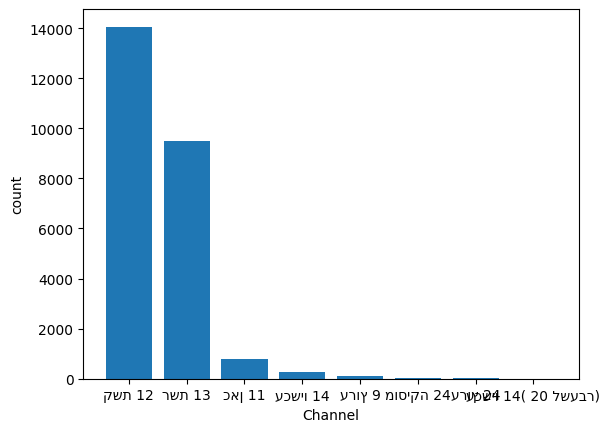

In [14]:
# We can see that by far, the most shows are in Keshet 12 and Reshet 13, so much that the other channels are insignificant in this dataset.
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Channel')
ax.set_ylabel('count')
plt.show()


In [15]:
# We drop the rows that don't belong to Keshet 12 or Reshet 13 based on the visualization above.
df = df.drop(df[(df['Channel'] != 'קשת 12') & (df['Channel'] != 'רשת 13')].index)

In [16]:
# We dropped 1,180 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23560 entries, 0 to 24739
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               23560 non-null  int64         
 1   Ranking          23560 non-null  int64         
 2   TV_Show          23560 non-null  object        
 3   Channel          23560 non-null  object        
 4   Duration         23560 non-null  float64       
 5   Ranking_Percent  23560 non-null  float64       
 6   Households       23560 non-null  int64         
 7   Datetime         23560 non-null  datetime64[ns]
 8   Month            23560 non-null  int64         
 9   Week             23560 non-null  int64         
 10  Day              23560 non-null  int64         
 11  Hour             23560 non-null  int64         
 12  Minute           23560 non-null  int64         
 13  Day_of_week      23560 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int6

In [17]:
# We are indeed left with only Keshet 12 and Reshet 13 in the dataset.
df['Channel'].unique()

array(['רשת 13', 'קשת 12'], dtype=object)

In [18]:
# Dropping TV shows that have less than 5 episodes, because they can skew the results.
value_counts = df['TV_Show'].value_counts()
to_drop = value_counts[value_counts < 5].index
df = df[~df['TV_Show'].isin(to_drop)]

In [19]:
# We dropped 1,878 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21682 entries, 0 to 24738
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               21682 non-null  int64         
 1   Ranking          21682 non-null  int64         
 2   TV_Show          21682 non-null  object        
 3   Channel          21682 non-null  object        
 4   Duration         21682 non-null  float64       
 5   Ranking_Percent  21682 non-null  float64       
 6   Households       21682 non-null  int64         
 7   Datetime         21682 non-null  datetime64[ns]
 8   Month            21682 non-null  int64         
 9   Week             21682 non-null  int64         
 10  Day              21682 non-null  int64         
 11  Hour             21682 non-null  int64         
 12  Minute           21682 non-null  int64         
 13  Day_of_week      21682 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int6

In [20]:
# Indeed we have shows that are 5 episodes and up.
df['TV_Show'].value_counts()

שש עם עודד בן עמי 12                          839
חדשות 13                                      838
חמש עם רפי רשף 12                             836
חדשות 12                                      834
מהדורה ראשונה 12                              813
                                             ... 
ארץ נהדרת ש.ח                                   5
עדי אשכנזי - מה זה השטויות האלה עונה 2 ש.ח      5
בלתי נראה ש.ח                                   5
העולם הבוקר בשישי - רגע לפני                    5
מיוחד-מבצע מגן וחץ - צהריים מוקדמת ע.12         5
Name: TV_Show, Length: 396, dtype: int64

C:\Users\bardd\AppData\Local\Temp\ipykernel_11700\2694678097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


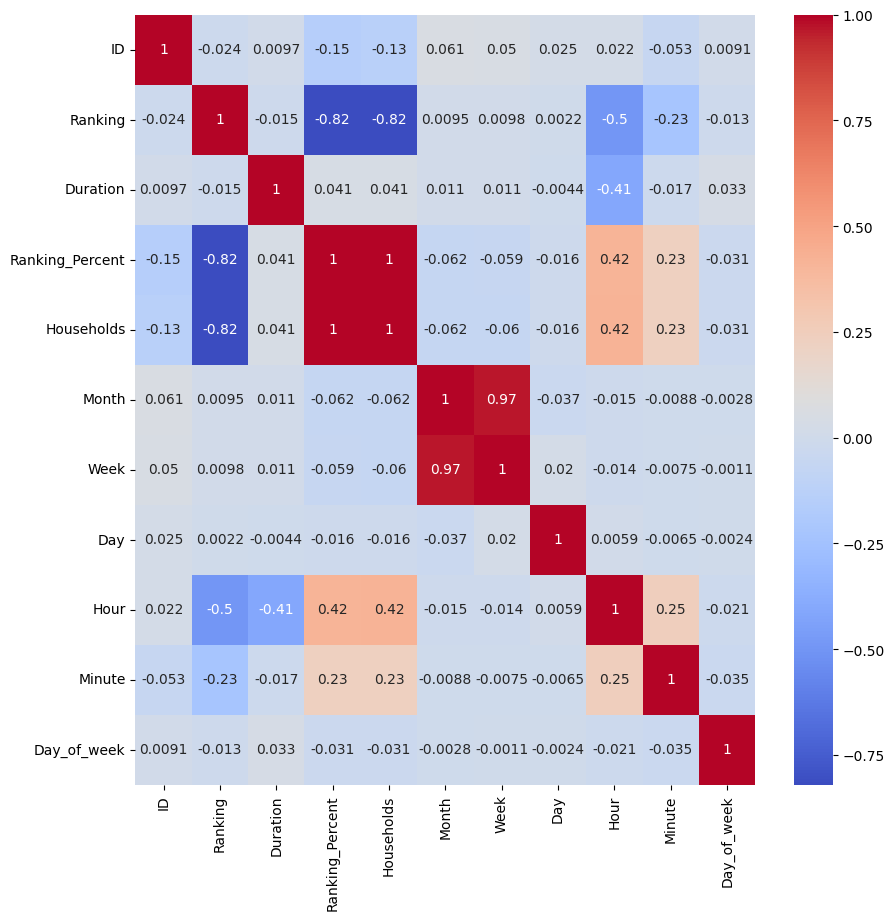

In [21]:
# Creating a correlation matrix and plotting it. we can see households and ranking percent are basically the same thing.
corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Dropping Households because we want to predict Ranking_Percent
df = df.drop(['ID', 'Households'], axis=1)
df.head()

,Ranking,TV_Show,Channel,Duration,Ranking_Percent,Datetime,Month,Week,Day,Hour,Minute,Day_of_week
0,1,האח הגדול 2020,רשת 13,152.0,20.1,2020-01-01 21:12:00,1,1,1,21,12,2
1,2,חדשות 12,קשת 12,88.0,14.0,2020-01-01 19:56:00,1,1,1,19,56,2
2,3,הצינור,רשת 13,22.0,13.8,2020-01-01 23:43:00,1,1,1,23,43,2
3,4,תכנית חיסכון 12,קשת 12,32.0,12.2,2020-01-01 19:21:00,1,1,1,19,21,2
4,5,חדשות 13,רשת 13,75.0,11.2,2020-01-01 19:57:00,1,1,1,19,57,2


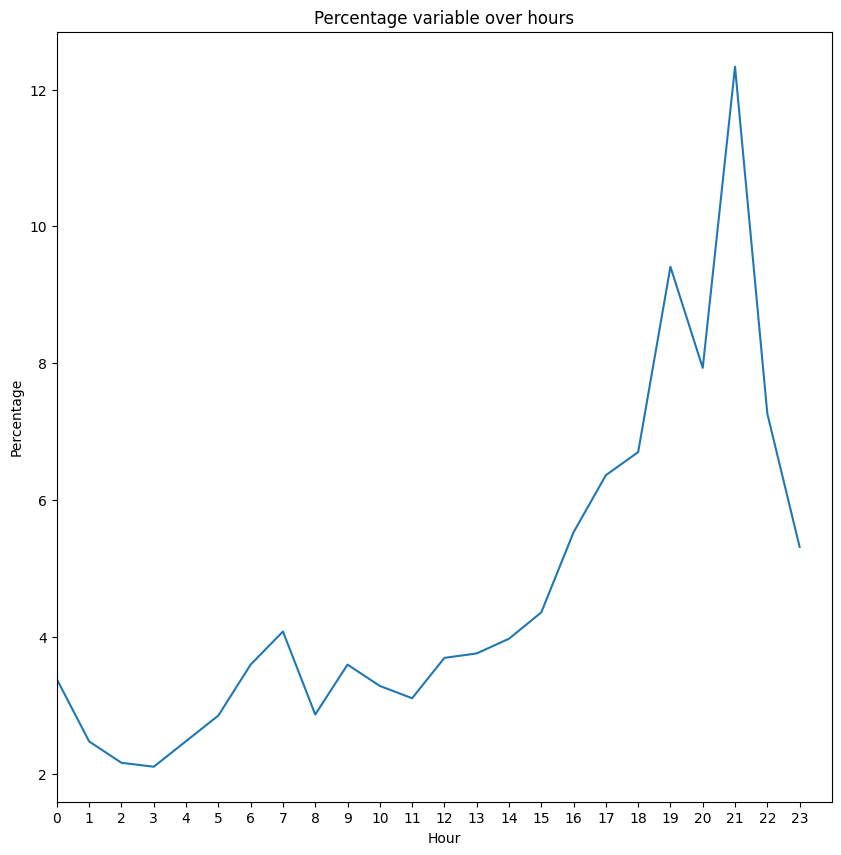

In [23]:
# Plotting Ranking percent by hours in the day. we can see that the highest rating is at 21:00 O'clock.
group_hr = df.groupby('Hour')['Ranking_Percent'].mean()

plt.xticks(range(24))
plt.xlim(0, 24)
group_hr.plot(kind='line', figsize=(10, 10))
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.title('Percentage variable over hours')
plt.show()

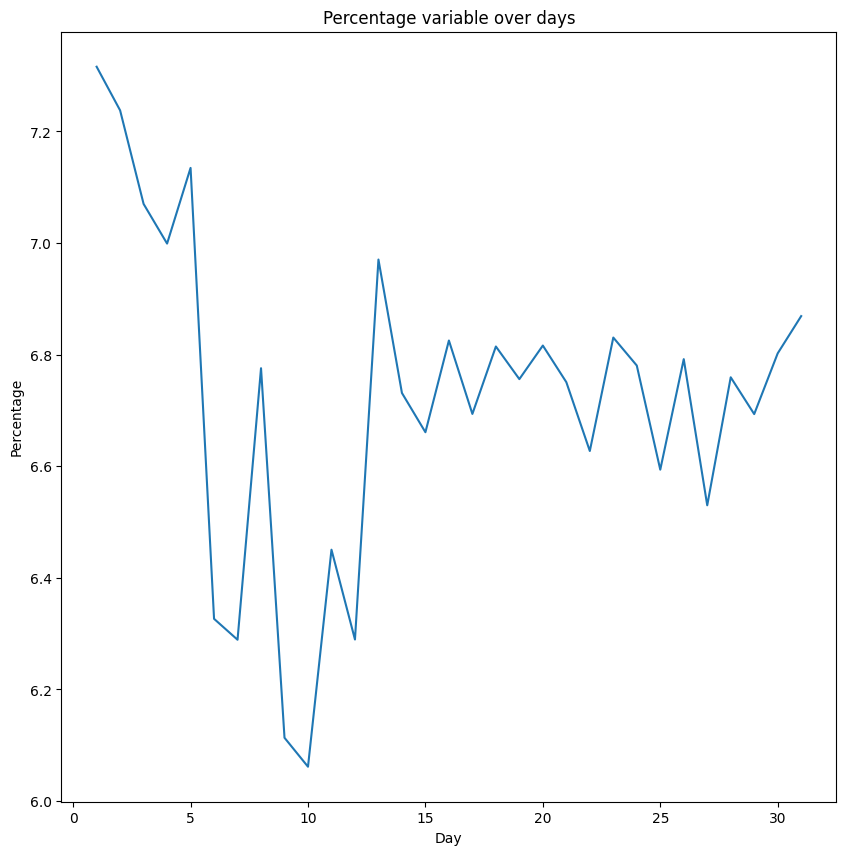

In [24]:
# Plotting Ranking percent by days of the month. we can see that the lowest rating is in the 10th of every month, Maybe salaries is the reason?.
group_day = df.groupby('Day')['Ranking_Percent'].mean()

group_day.plot(kind='line', figsize=(10, 10))
plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Percentage variable over days')
plt.show()

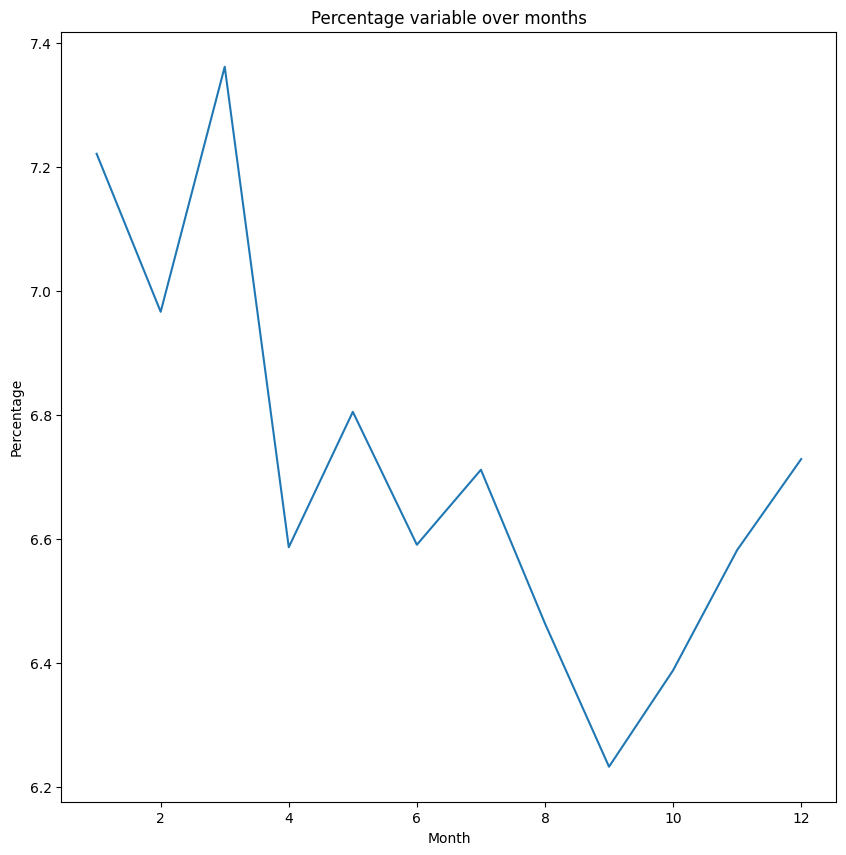

In [25]:
# Plotting Ranking percent by months of the year. we can see that the lowest rating is in September, and the highest rating is in March.
# Winter and summer maybe?
group_month = df.groupby('Month')['Ranking_Percent'].mean()

group_month.plot(kind='line', figsize=(10, 10))
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Percentage variable over months')
plt.show()

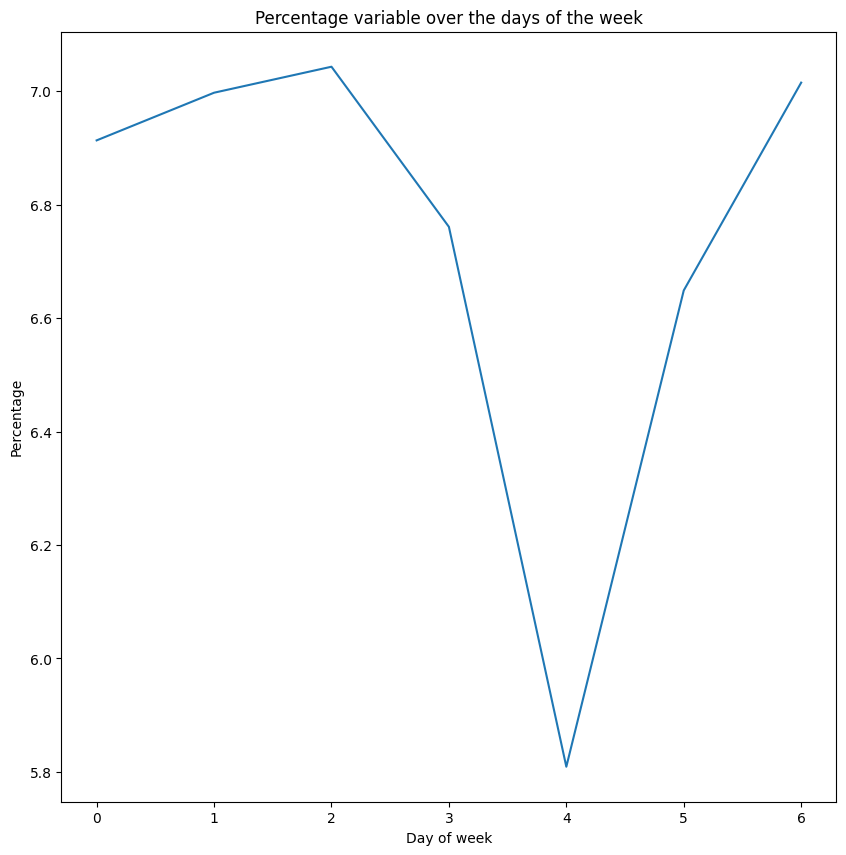

In [26]:
# Plotting Ranking percent by days of the week. we can see that the lowest rating is in Wednesday and the highest in Monday.
group_dow = df.groupby('Day_of_week')['Ranking_Percent'].mean()

group_dow.plot(kind='line', figsize=(10, 10))
plt.xlabel('Day of week')
plt.ylabel('Percentage')
plt.title('Percentage variable over the days of the week')
plt.show()

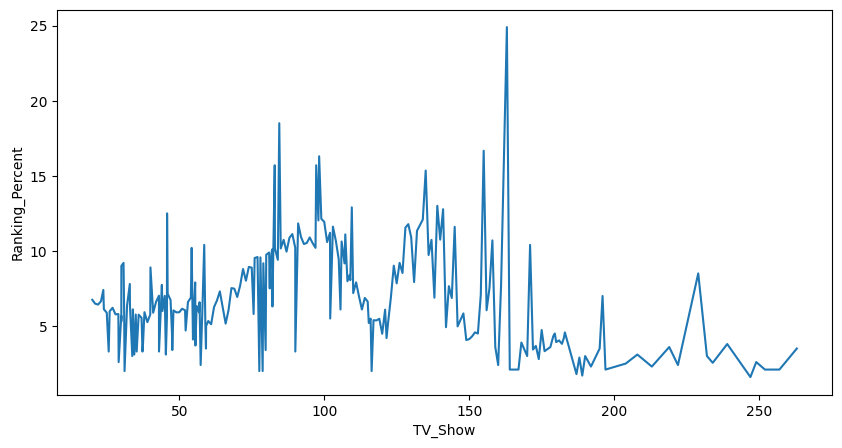

In [27]:
# Plotting Ranking percent by Duration of a show. we can see spikes around 80 minutes, 100 minutes and 170-180 minutes.
grouped_df = df.groupby('Duration')

# Calculate the mean of the weight column for each group
mean_rank_df = grouped_df['Ranking_Percent'].mean()

# Plot the mean of the weight column for each group
mean_rank_df.plot(kind='line', figsize=(10, 5))

# Add labels to the axes
plt.xlabel('TV_Show')
plt.ylabel('Ranking_Percent')

# Show the plot
plt.show()

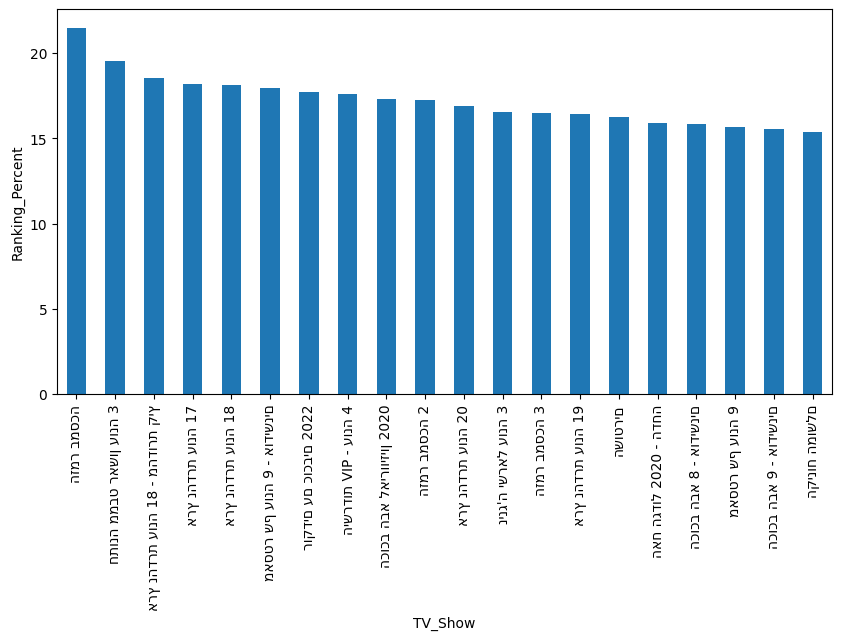

In [28]:
# Showing the 20 shows with the highest rating in the last 3 years. first is Hazamar Bamasechah, Second is Married at first sight etc..
# Mostly reality shows.
grouped_df = df.groupby('TV_Show')

# Calculate the mean of the weight column for each group
mean_rank_df = grouped_df['Ranking_Percent'].mean().nlargest(20)

# Plot the mean of the weight column for each group
mean_rank_df.plot(kind='bar', figsize=(10, 5))

# Add labels to the axes
plt.xlabel('TV_Show')
plt.ylabel('Ranking_Percent')

# Show the plot
plt.show()

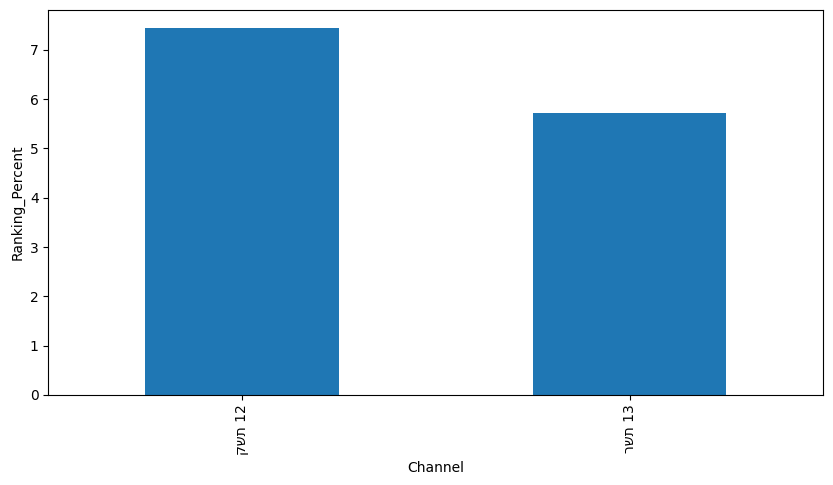

In [29]:
# Keshet has more rating than Reshet.
grouped_df = df.groupby('Channel')

# Calculate the mean of the weight column for each group
mean_rank_df = grouped_df['Ranking_Percent'].mean()

# Plot the mean of the weight column for each group
mean_rank_df.plot(kind='bar', figsize=(10, 5))

# Add labels to the axes
plt.xlabel('Channel')
plt.ylabel('Ranking_Percent')

# Show the plot
plt.show()

In [30]:
# Saving the processed dataset
df.to_csv('processed.csv', encoding='windows-1255')